In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3  + np.random.normal(0, 1, size=100)

<function matplotlib.pyplot.show(*args, **kw)>

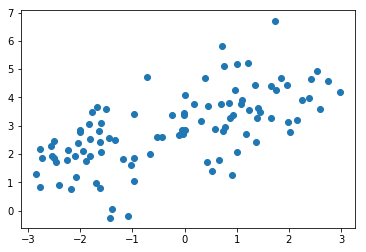

In [8]:
plt.scatter(x, y)
plt.show

In [9]:
from sklearn.model_selection import train_test_split
np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=20)),
    ('sta_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_poly_predict)

278834.80947384535

In [12]:
def polt_model(model):
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(X_plot)

    plt.scatter(x,y)
    plt.plot(X_plot[:,0],y_plot, color='r')
    plt.axis([-3,3,0,6])
    plt.show

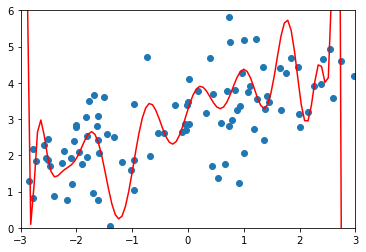

In [13]:
polt_model(poly_reg)

# LASSO

In [14]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('sta_scaler',StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

In [17]:
from sklearn.metrics import mean_squared_error

In [20]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)
y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1137516746017848

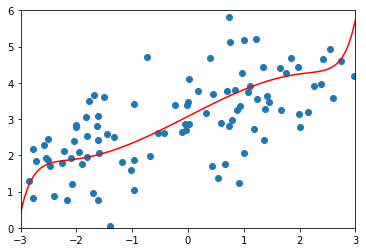

In [21]:
polt_model(lasso1_reg)

In [29]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)
y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.9034553859626224

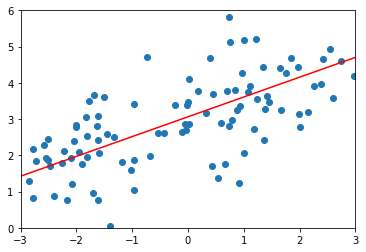

In [30]:
polt_model(lasso2_reg)